## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
#import tensorflow as tf

In [0]:
#tf.__version__

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [0]:
print('--- THE TRAINING DATA ---')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

--- THE TRAINING DATA ---
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [0]:
print('--- THE TEST DATA ---')
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

--- THE TEST DATA ---
y_train shape: (60000,)
y_test shape: (10000,)


### Find dimensions of an image in the dataset

In [0]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [0]:
x_train[1].shape

(28, 28)

In [0]:
# the image size is 28 X 28 pixels

In [0]:
import matplotlib.pyplot as plt

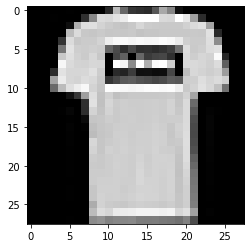

In [0]:
plt.imshow(x_train[1],cmap='gist_gray')

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10) #10 is the number of classes
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train=x_train.astype('float32')

In [0]:
x_train=x_train/255

In [0]:
x_test=x_test.astype('float32')

In [0]:
x_test=x_test/255

In [0]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
        0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215687, 0.53333336, 0.85882354,
        0.84705883, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.8509804 , 0.84313726, 0.99607843,
        0.90588236, 0.627451  , 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.6901961 , 0.87058824, 0.8784314 , 0.83137256,
        0.79607844, 0.7764706 , 0.76862746, 0.78431374, 0.84313726,
        0.8       , 0.7921

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:

    # Define Model
    c_model = Sequential()

    # 1st Conv Layer
    c_model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    c_model.add(Activation('relu'))

    # 2nd Conv Layer
    c_model.add(Convolution2D(32, 3, 3))
    c_model.add(Activation('relu'))

    
    # Fully Connected Layer
    c_model.add(Flatten())
    c_model.add(Dense(128))
    c_model.add(Activation('relu'))
    

    # Prediction Layer
    c_model.add(Dense(10))
    c_model.add(Activation('softmax'))

    # Loss and Optimizer
    c_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [0]:
c_model.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.3742 - acc: 0.8660 - val_loss: 0.3148 - val_acc: 0.8861
Epoch 2/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.2344 - acc: 0.9141 - val_loss: 0.2517 - val_acc: 0.9077
Epoch 3/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.1708 - acc: 0.9361 - val_loss: 0.2418 - val_acc: 0.9165
Epoch 4/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.1204 - acc: 0.9552 - val_loss: 0.2577 - val_acc: 0.9181
Epoch 5/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0812 - acc: 0.9697 - val_loss: 0.3172 - val_acc: 0.9105
Epoch 6/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0547 - acc: 0.9804 - val_loss: 0.3203 - val_acc: 0.9166
Epoch 7/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0396 - acc: 0.9853 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# Define Model
c_model_2 = Sequential()

# 1st Conv Layer
c_model_2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
c_model_2.add(Activation('relu'))

# 2nd Conv Layer
c_model_2.add(Convolution2D(32, 3, 3))
c_model_2.add(Activation('relu'))

# Max Pooling
c_model_2.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
c_model_2.add(Dropout(0.25))

# flatten into 2 fully connected layers (or Dense Layers)
c_model_2.add(Flatten())
c_model_2.add(Dense(128))
c_model_2.add(Activation('relu'))
c_model_2.add(Dense(10))
c_model_2.add(Activation('softmax'))

# Loss and Optimizer
c_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [0]:
# Train the model
c_model_2.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.4051 - acc: 0.8552 - val_loss: 0.2972 - val_acc: 0.8920
Epoch 2/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.2652 - acc: 0.9017 - val_loss: 0.2465 - val_acc: 0.9106
Epoch 3/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.2156 - acc: 0.9195 - val_loss: 0.2548 - val_acc: 0.9078
Epoch 4/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.1812 - acc: 0.9322 - val_loss: 0.2342 - val_acc: 0.9144
Epoch 5/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.1507 - acc: 0.9432 - val_loss: 0.2275 - val_acc: 0.9208
Epoch 6/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.1284 - acc: 0.9514 - val_loss: 0.2348 - val_acc: 0.9231
Epoch 7/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.1090 - acc: 0.9588 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images



In [0]:
# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

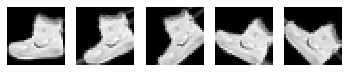

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
c_model_2.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
   8/1875 [..............................] - ETA: 32s - loss: 3.0632 - acc: 0.5000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 34s 18ms/step - loss: 0.5120 - acc: 0.8180 - val_loss: 0.2874 - val_acc: 0.9000
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3703 - acc: 0.8651 - val_loss: 0.2788 - val_acc: 0.9061
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3301 - acc: 0.8801 - val_loss: 0.2685 - val_acc: 0.9077
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3095 - acc: 0.8860 - val_loss: 0.2745 - val_acc: 0.9104
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2927 - acc: 0.8930 - val_loss: 0.2582 - val_acc: 0.9110
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2838 - acc: 0.8961 - val_loss: 0.2597 - val_acc: 0.9144
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2761 - acc: 0.8991 - val_loss: 0.2651 - val_acc: 0.9103
Epoch 8/10
1875/1875 [==============================] - 34s

###  Report the final train and validation accuracy

In [0]:
loss_and_metrics = c_model_2.evaluate(x_train, y_train)
print('Test accuracy:', loss_and_metrics[1])

60000/60000 [==============================] - 6s 92us/step
Test accuracy: 0.9473166666666667


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train2, y_train2), (x_test2, y_test2) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(x_train2)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

In [0]:
x_train2=x_train2.astype('float32')/255

In [0]:
from matplotlib import pyplot as plt

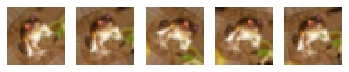

In [0]:
gen = datagen.flow(x_train2[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()